In this notebook, we'll do some gradient descent in 1D following this exercice:

>I explained gradient descent when CC is a function of two variables, and when it's a function of more than two variables. What happens when CC is a function of just one variable? Can you provide a geometric interpretation of what gradient descent is doing in the one-dimensional case?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline
from ipywidgets import interact, Button, FloatSlider, HBox, VBox
from IPython.core.display import clear_output

In [2]:
def cost_func(x):
    "Cost function for our problem."
    return x**2

def grad_func(x):
    "Gradient for our problem."
    return 2*x

In [3]:
class Descender:
    "Class for our problem."
    def __init__(self, cost_func, grad_func, x0, xrange):
        "Inits class."
        self.cost_func = cost_func
        self.grad_func = grad_func
        self.x = x0
        self.history = [x0]
        self.xrange = xrange
        
    def step(self, step_value):
        "Steps the function."
        self.x = self.x - grad_func(self.x) * step_value
        self.history.append(self.x)
        
    def plot(self):
        "Plots the function and its gradient descent."
        clear_output()
        plt.plot([x for x in self.xrange], [self.cost_func(x) for x in self.xrange])
        plt.plot([x for x in self.history], [self.cost_func(x) for x in self.history], '-o')
    
    def reset(self):
        "Resets descender."
        self.x = self.history[0]
        self.history = [self.x]

In [4]:
desc = Descender(cost_func, grad_func, 10, np.arange(-10, 10, 0.1))

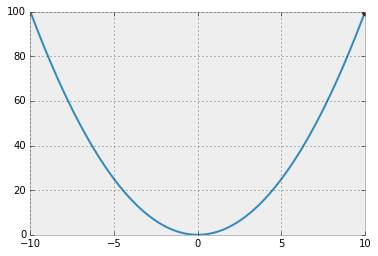

In [5]:
desc.step(0.001)
desc.plot()

In [6]:
press = Button(description='Do a step and plot')
reset = Button(description='Reset')
slider = FloatSlider(min=0.01, max=1.0, step=0.01, value=0.3)
reset.on_click(lambda e: desc.reset())
press.on_click(lambda e: desc.step(slider.value) or desc.plot())
VBox([HBox([press, reset]),
      slider])

Possible observations:

- the steps are large when the gradient is large
- the steps are small when the gradient is small
- hence it makes sense to increase the learning rate if your problem is similar and you've been learning for a long time
- if the learning rate is too large, you'll run in trouble

Let's make a chart to show this.

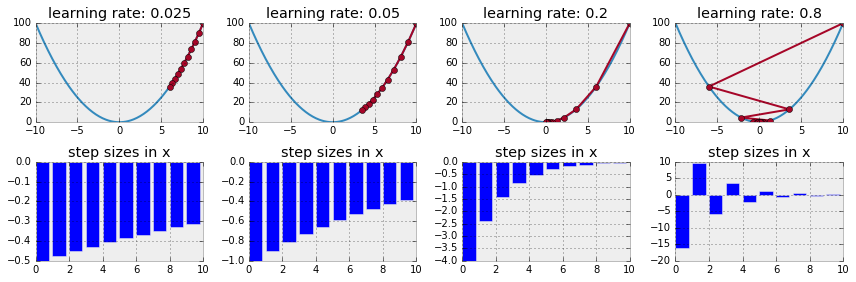

In [7]:
plt.figure(figsize=(12, 4))
desc = Descender(cost_func, grad_func, 10, np.arange(-10, 10, 0.1))
for ind, step_value in enumerate([0.025, 0.05, 0.2, 0.8]):
    plt.subplot(2, 4, ind+1)
    [desc.step(step_value) for _ in range(10)]
    desc.plot()
    plt.title("learning rate: {}".format(step_value))
    plt.subplot(2, 4, 4 + ind+1)
    diffs = np.diff(desc.history)
    plt.bar(np.arange(diffs.size), diffs)
    plt.title('step sizes in x')
    desc.reset()
    
plt.tight_layout()